In [3]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
# Загружаем данные
df = pd.read_csv('Coffe_sales.csv')

Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None

Описание числовых признаков:
       hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501 

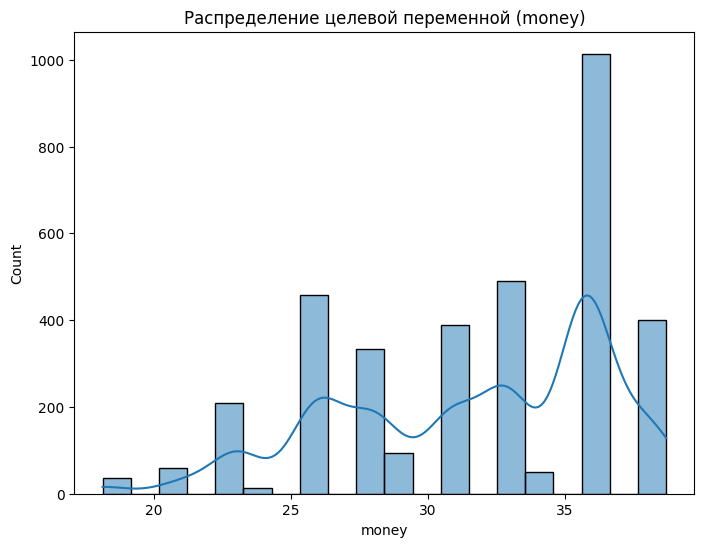

In [5]:
# 1. Разведочный анализ данных (EDA)
print("Общая информация о датасете:")
print(df.info())
print("\nОписание числовых признаков:")
print(df.describe())

# Проверка на пропуски
print("\nПропущенные значения:")
print(df.isnull().sum())

# Анализ целевой переменной (money)
plt.figure(figsize=(8, 6))
sns.histplot(df['money'], bins=20, kde=True)
plt.title('Распределение целевой переменной (money)')
plt.show()

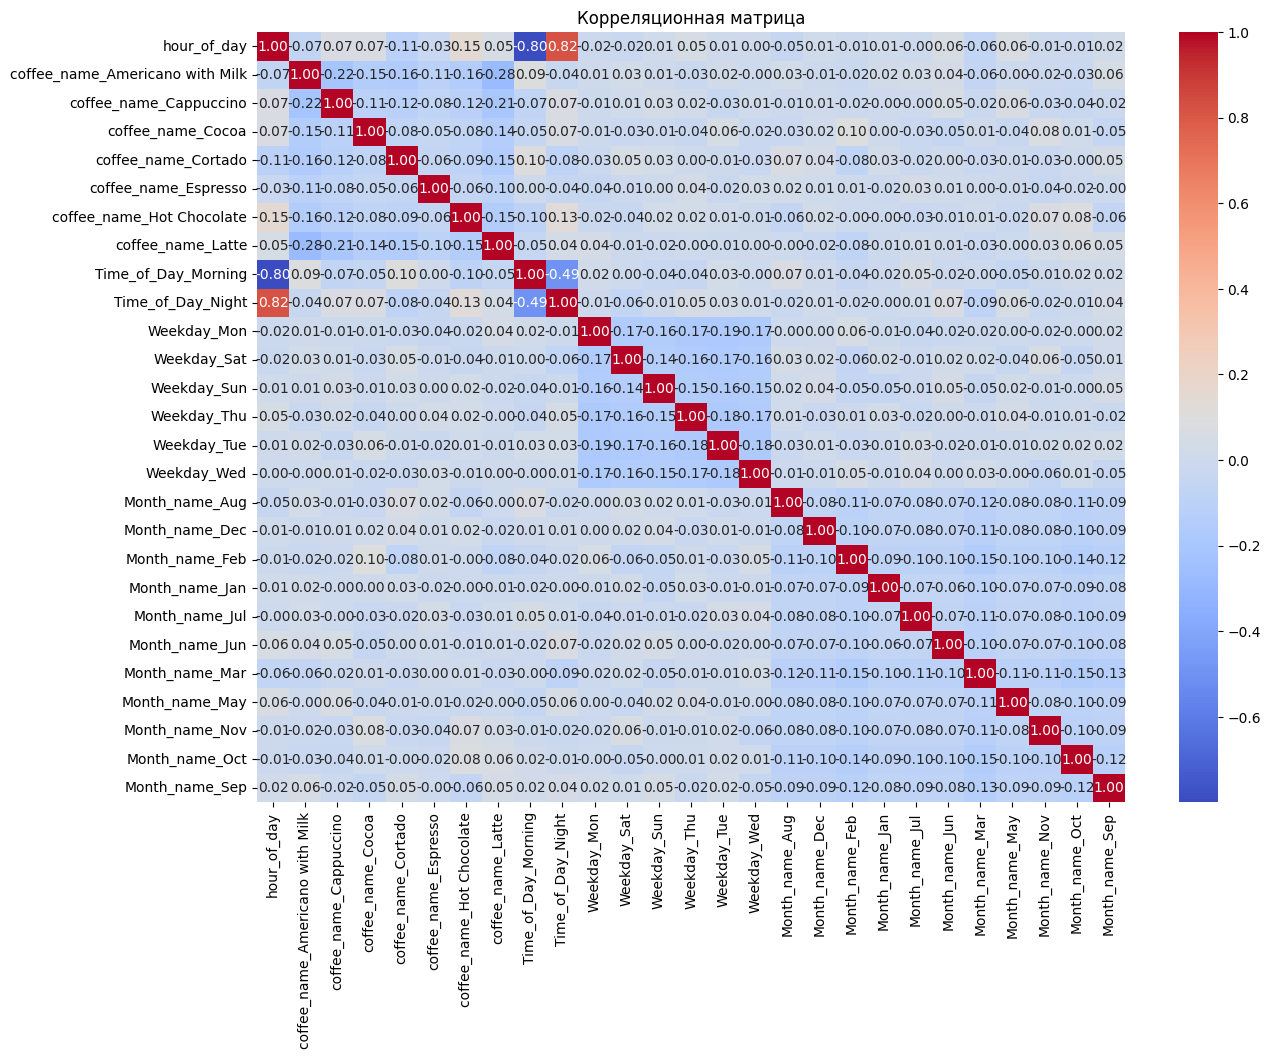

In [8]:
# 2. Анализ влияния признаков на целевую переменную
# Преобразуем категориальные признаки
categorical_cols = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features.toarray(), 
                         columns=encoder.get_feature_names_out(categorical_cols))

# Создаем новый датафрейм с закодированными признаками
X = pd.concat([df[['hour_of_day']], encoded_df], axis=1)
y = df['money']

# Корреляционный анализ
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [9]:
# 3. Обработка пропусков
# В нашем датасете пропусков нет

# 4. Подготовка данных для модели
# Масштабируем числовые признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# 5. Обучение модели на всей выборке
model_full = LinearRegression()
model_full.fit(X_scaled, y)

# Предсказания и метрики
y_pred_full = model_full.predict(X_scaled)
print("\nМетрики на полной выборке:")
print(f"MSE: {mean_squared_error(y, y_pred_full)}")
print(f"R2: {r2_score(y, y_pred_full)}")



Метрики на полной выборке:
MSE: 0.532352336673765
R2: 0.9776188763198317



Метрики на обучающей выборке:
Train MSE: 0.5324039219423916
Train R2: 0.9778226911576122

Метрики на тестовой выборке:
Test MSE: 0.5372395807138457
Test R2: 0.9765158554990814


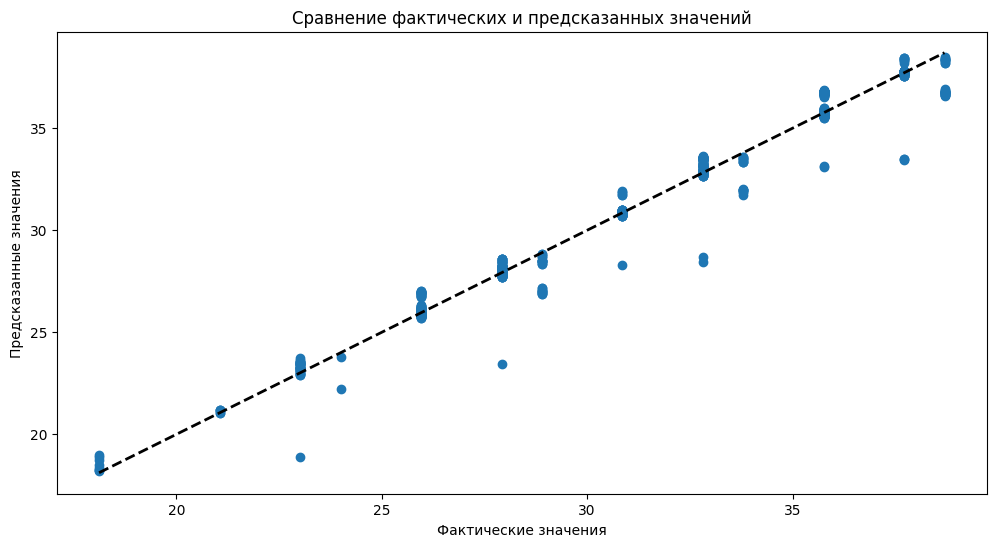

In [11]:
# 6. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Метрики
print("\nМетрики на обучающей выборке:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Train R2: {r2_score(y_train, y_train_pred)}")

print("\nМетрики на тестовой выборке:")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Test R2: {r2_score(y_test, y_test_pred)}")

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()